In [1]:
#Importing libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from datetime import datetime
import yaml 

In [2]:
# Importing directories
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../..")))

from src.utils.config import PROCESSED_DATA_STOCK_DIR, BASE_DIR

with open(os.path.join(BASE_DIR, "config/stock_config.yaml")) as file:
    SETTINGS = yaml.safe_load(file)

SETTINGS

{'data': {'n_symbol': 'NFLX',
  'days': 16,
  'keep_days': 7,
  'output_size': 3500,
  'interval': '1min'},
 'preprocessing': {'test_size': 350, 'random_state': 1003}}

In [3]:
# Importing dependecies
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [4]:
# Importing data 
stock_data = pd.read_csv(os.path.join(PROCESSED_DATA_STOCK_DIR, f'{datetime.now().strftime("%Y-%m-%d")}_cleaned_data.csv'))

In [5]:
# Looking at top 5 rows of the dataset
stock_data.head()

,ds,open,high,low,y,volume
0,2025-08-22 14:55:00,1202.33997,1202.48584,1202.04175,1202.09998,4232
1,2025-08-22 14:56:00,1201.79004,1201.79004,1201.79004,1201.79004,461
2,2025-08-22 14:57:00,1202.00000,1202.60986,1202.00000,1202.60986,6330
3,2025-08-22 14:58:00,1202.25000,1202.32500,1202.16000,1202.30000,220
4,2025-08-22 14:59:00,1202.27000,1202.27500,1202.27000,1202.27500,12


In [6]:
# Looking at bottom 5 rows of the dataset
stock_data.tail()

,ds,open,high,low,y,volume
3495,2025-09-05 15:55:00,1243.19995,1244.02246,1243.03003,1243.04004,8448
3496,2025-09-05 15:56:00,1243.27002,1243.45996,1242.85999,1243.09497,15134
3497,2025-09-05 15:57:00,1242.84998,1243.75000,1242.65002,1243.75000,32626
3498,2025-09-05 15:58:00,1243.37000,1243.63000,1242.92249,1243.23999,26312
3499,2025-09-05 15:59:00,1243.31494,1244.17004,1242.85498,1244.17004,52242


In [7]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      3500 non-null   object 
 1   open    3500 non-null   float64
 2   high    3500 non-null   float64
 3   low     3500 non-null   float64
 4   y       3500 non-null   float64
 5   volume  3500 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 164.2+ KB


In [8]:
# Creating Datetime features
stock_data['ds'] = pd.to_datetime(stock_data['ds'])
stock_data['hour'] = stock_data['ds'].dt.hour
stock_data['minute']= stock_data['ds'].dt.minute
stock_data['day_of_week']  = stock_data['ds'].dt.day_of_week

In [9]:
# Lets have a look at stock data
stock_data.tail()

,ds,open,high,low,y,volume,hour,minute,day_of_week
3495,2025-09-05 15:55:00,1243.19995,1244.02246,1243.03003,1243.04004,8448,15,55,4
3496,2025-09-05 15:56:00,1243.27002,1243.45996,1242.85999,1243.09497,15134,15,56,4
3497,2025-09-05 15:57:00,1242.84998,1243.75000,1242.65002,1243.75000,32626,15,57,4
3498,2025-09-05 15:58:00,1243.37000,1243.63000,1242.92249,1243.23999,26312,15,58,4
3499,2025-09-05 15:59:00,1243.31494,1244.17004,1242.85498,1244.17004,52242,15,59,4


In [10]:
stock_data.head(10)

,ds,open,high,low,y,volume,hour,minute,day_of_week
0,2025-08-22 14:55:00,1202.33997,1202.48584,1202.04175,1202.09998,4232,14,55,4
1,2025-08-22 14:56:00,1201.79004,1201.79004,1201.79004,1201.79004,461,14,56,4
2,2025-08-22 14:57:00,1202.00000,1202.60986,1202.00000,1202.60986,6330,14,57,4
3,2025-08-22 14:58:00,1202.25000,1202.32500,1202.16000,1202.30000,220,14,58,4
4,2025-08-22 14:59:00,1202.27000,1202.27500,1202.27000,1202.27500,12,14,59,4
5,2025-08-22 15:00:00,1202.36377,1202.62500,1202.36377,1202.62500,3002,15,0,4
6,2025-08-22 15:01:00,1202.50000,1202.62000,1202.50000,1202.62000,2447,15,1,4
7,2025-08-22 15:02:00,1202.75000,1202.75000,1202.69995,1202.69995,1738,15,2,4
8,2025-08-22 15:03:00,1202.50000,1202.50000,1202.50000,1202.50000,2172,15,3,4
9,2025-08-22 15:04:00,1202.55005,1202.78003,1202.43005,1202.43005,2062,15,4,4


In [11]:
# Lag Features
for lag in [1, 5, 15, 30]:
        stock_data[f'lag_close_{lag}'] =  stock_data['y'].shift(lag)
        stock_data[f'lag_volume_{lag}'] = stock_data['volume'].shift(lag)

In [12]:
# Correlation matrix between lagged values and y values
columns = ["y"] + [f"lag_{var}_{lag}" for var in ['close', 'volume'] for lag in [1, 5, 15, 30]]
corr_matrix= stock_data[columns].corr()
corr_matrix

,y,lag_close_1,lag_close_5,lag_close_15,lag_close_30,lag_volume_1,lag_volume_5,lag_volume_15,lag_volume_30
y,1.000000,0.998215,0.991292,0.975759,0.951346,-0.026945,-0.026719,-0.005883,0.002700
lag_close_1,0.998215,1.000000,0.992955,0.977516,0.953047,-0.023153,-0.027904,-0.003780,0.004279
lag_close_5,0.991292,0.992955,1.000000,0.983847,0.959355,-0.031697,-0.025643,-0.012607,0.001514
lag_close_15,0.975759,0.977516,0.983847,1.000000,0.975606,-0.042445,-0.043769,-0.026548,-0.005081
lag_close_30,0.951346,0.953047,0.959355,0.975606,1.000000,-0.044181,-0.046893,-0.047554,-0.025752
lag_volume_1,-0.026945,-0.023153,-0.031697,-0.042445,-0.044181,1.000000,0.353700,0.208107,0.124942
lag_volume_5,-0.026719,-0.027904,-0.025643,-0.043769,-0.046893,0.353700,1.000000,0.242543,0.134274
lag_volume_15,-0.005883,-0.003780,-0.012607,-0.026548,-0.047554,0.208107,0.242543,1.000000,0.204112
lag_volume_30,0.002700,0.004279,0.001514,-0.005081,-0.025752,0.124942,0.134274,0.204112,1.000000


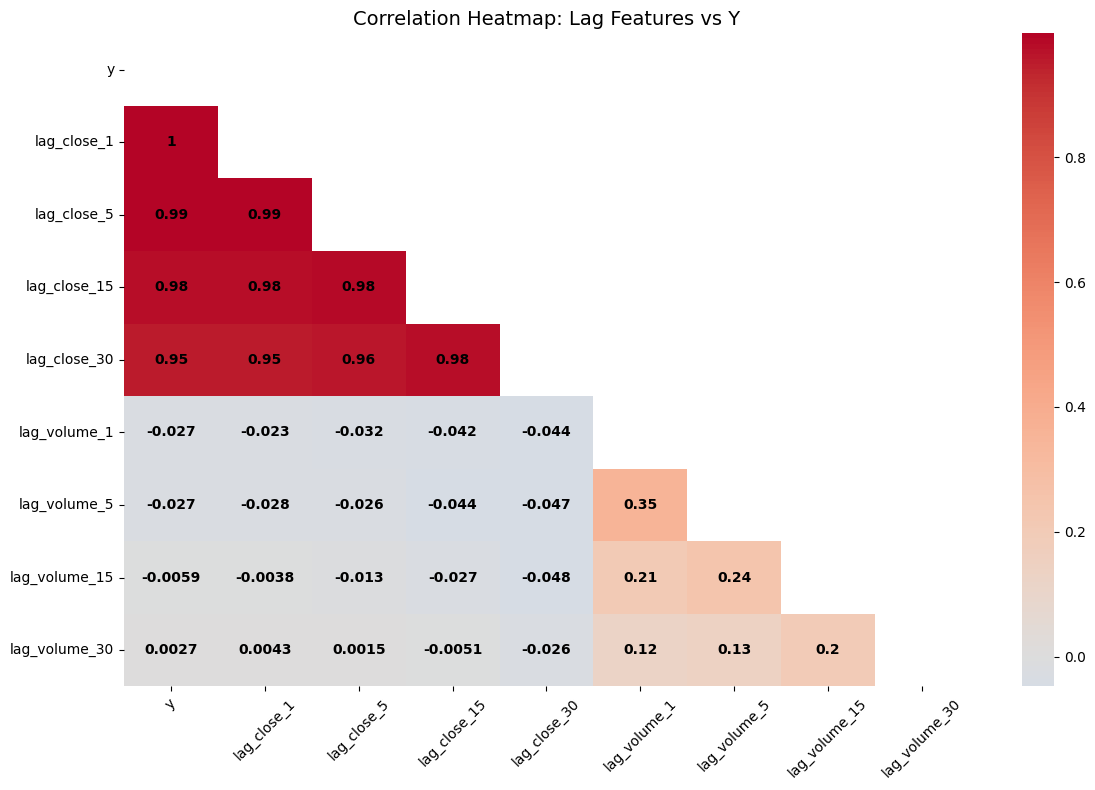

In [13]:
#Plotting the correlation matrix

# Masking upper triangle 
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))


plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix,
            mask=mask, 
            cmap='coolwarm', 
            fmt=".2g", 
            annot=True, 
            annot_kws={"size":10, "weight":"bold", "color" :"black"},
            center=0)

plt.title("Correlation Heatmap: Lag Features vs Y", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [14]:
# Dropping volume lag column as it is not contributing anything to predict future value
stock_data = stock_data.drop(columns=[f'lag_volume_{lag}' for lag in [1, 5, 15, 30]])

In [15]:
# Rollng window features
for windows in [5, 10, 15, 30]:
    stock_data[f'rolling_mean_{windows}'] = stock_data["y"].rolling(windows).mean()
    stock_data[f'rolling_std_{windows}'] = stock_data["y"].rolling(windows).std()

In [16]:
stock_data

,ds,open,high,low,y,volume,hour,minute,day_of_week,lag_close_1,...,lag_close_15,lag_close_30,rolling_mean_5,rolling_std_5,rolling_mean_10,rolling_std_10,rolling_mean_15,rolling_std_15,rolling_mean_30,rolling_std_30
0,2025-08-22 14:55:00,1202.33997,1202.48584,1202.04175,1202.09998,4232,14,55,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-08-22 14:56:00,1201.79004,1201.79004,1201.79004,1201.79004,461,14,56,4,1202.09998,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-08-22 14:57:00,1202.00000,1202.60986,1202.00000,1202.60986,6330,14,57,4,1201.79004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-08-22 14:58:00,1202.25000,1202.32500,1202.16000,1202.30000,220,14,58,4,1202.60986,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-08-22 14:59:00,1202.27000,1202.27500,1202.27000,1202.27500,12,14,59,4,1202.30000,...,NaN,NaN,1202.214976,0.300233,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,2025-09-05 15:55:00,1243.19995,1244.02246,1243.03003,1243.04004,8448,15,55,4,1242.69995,...,1245.05994,1244.87000,1243.230152,0.540954,1243.278577,0.562277,1243.745517,0.871453,1244.348059,0.980267
3496,2025-09-05 15:56:00,1243.27002,1243.45996,1242.85999,1243.09497,15134,15,56,4,1243.04004,...,1245.06714,1246.06006,1243.026978,0.227370,1243.191077,0.508213,1243.614039,0.803975,1244.249223,0.950735
3497,2025-09-05 15:57:00,1242.84998,1243.75000,1242.65002,1243.75000,32626,15,57,4,1243.09497,...,1245.01001,1245.11011,1243.110986,0.388093,1243.271082,0.528601,1243.530038,0.707771,1244.203886,0.940642
3498,2025-09-05 15:58:00,1243.37000,1243.63000,1242.92249,1243.23999,26312,15,58,4,1243.75000,...,1245.15991,1245.56006,1243.164990,0.382309,1243.295081,0.520309,1243.402043,0.547401,1244.126550,0.920455


In [17]:
# Correlation matrix between rolling features values and y values
columns = ["y"] + [f"rolling_{var}_{lag}" for var in ['mean', 'std'] for lag in [5, 10, 15, 30]]
corr_matrix= stock_data[columns].corr()
corr_matrix

,y,rolling_mean_5,rolling_mean_10,rolling_mean_15,rolling_mean_30,rolling_std_5,rolling_std_10,rolling_std_15,rolling_std_30
y,1.000000,0.997874,0.995150,0.992614,0.984404,-0.020723,-0.033196,-0.046701,-0.064162
rolling_mean_5,0.997874,1.000000,0.998547,0.996353,0.988634,-0.019579,-0.035791,-0.048886,-0.067073
rolling_mean_10,0.995150,0.998547,1.000000,0.999087,0.992782,-0.018590,-0.037715,-0.051558,-0.070998
rolling_mean_15,0.992614,0.996353,0.999087,1.000000,0.995943,-0.018655,-0.038457,-0.054195,-0.075262
rolling_mean_30,0.984404,0.988634,0.992782,0.995943,1.000000,-0.024711,-0.043306,-0.060430,-0.088377
rolling_std_5,-0.020723,-0.019579,-0.018590,-0.018655,-0.024711,1.000000,0.798549,0.682799,0.517151
rolling_std_10,-0.033196,-0.035791,-0.037715,-0.038457,-0.043306,0.798549,1.000000,0.899374,0.649019
rolling_std_15,-0.046701,-0.048886,-0.051558,-0.054195,-0.060430,0.682799,0.899374,1.000000,0.773272
rolling_std_30,-0.064162,-0.067073,-0.070998,-0.075262,-0.088377,0.517151,0.649019,0.773272,1.000000


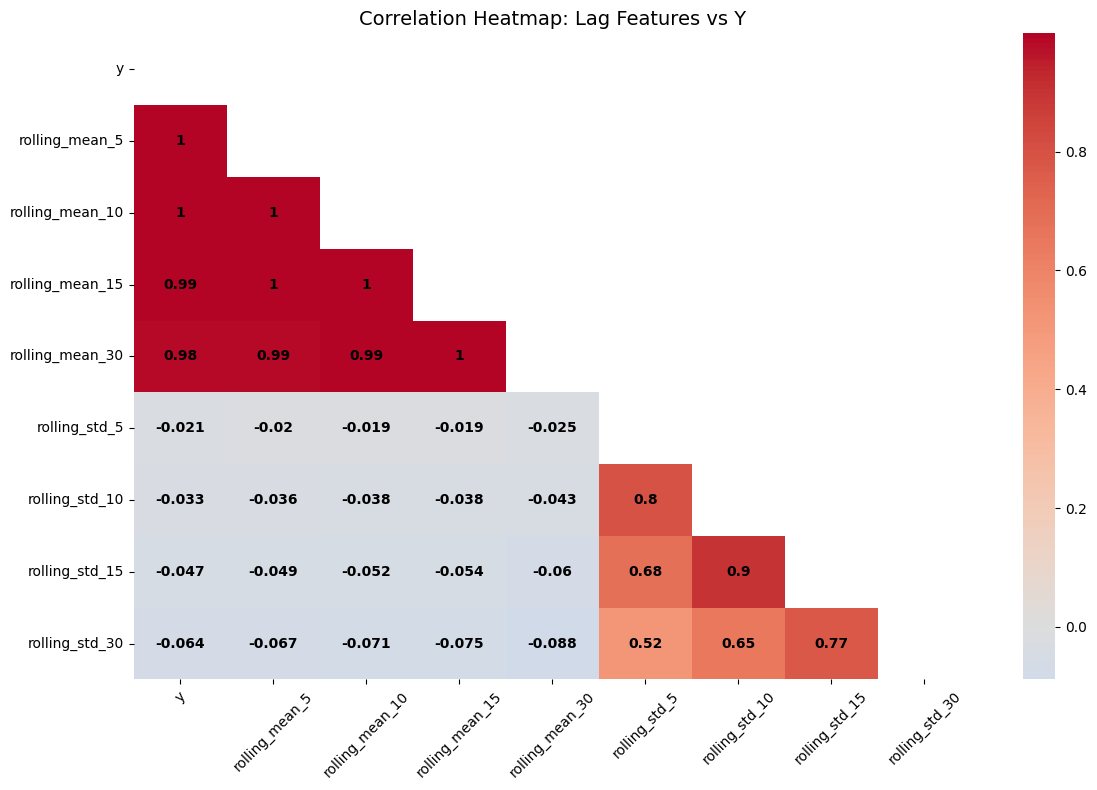

In [18]:
#Plotting the correlation matrix

# Masking upper triangle 
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))


plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix,
            mask=mask, 
            cmap='coolwarm', 
            fmt=".2g", 
            annot=True, 
            annot_kws={"size":10, "weight":"bold", "color" :"black"},
            center=0)

plt.title("Correlation Heatmap: Lag Features vs Y", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [19]:
stock_data['returns'] = stock_data['y'].pct_change()   
stock_data['cumulative_returns'] = (1 + stock_data['returns']).cumprod()
stock_data['momentum_10'] = stock_data['returns'].rolling(10).sum()



In [20]:
import ta

stock_data['rsi'] = ta.momentum.RSIIndicator(stock_data['y'], window=14).rsi()
stock_data['macd'] = ta.trend.MACD(stock_data['y']).macd()
stock_data['bollinger_high'] = ta.volatility.BollingerBands(stock_data['y']).bollinger_hband()
stock_data['bollinger_low'] = ta.volatility.BollingerBands(stock_data['y']).bollinger_lband()


### Feature Engineering Explained   (Explaination from chatgpt)

1. **Returns (`returns`)**:  
   The percentage change in price from the previous time step. It shows how much the asset's price has moved and can be interpreted as the profit/loss if invested in the previous period.

2. **Cumulative Returns (`cumulative_returns`)**:  
   The compounded product of `(1 + returns)` over time. It represents how an investment would have grown if held from the beginning.

3. **Momentum (`momentum_10`)**:  
   The sum of returns over a rolling window (e.g., 10 periods). Positive values indicate upward momentum, and negative values indicate downward momentum.

4. **Relative Strength Index (RSI, `rsi`)**:  
   A momentum oscillator measuring overbought or oversold conditions based on price changes (usually 14 periods). Values >70 often indicate overbought, <30 indicate oversold. Shows potential reversal points.

5. **Bollinger Bands (`bollinger_high`, `bollinger_low`)**:  
   Volatility-based bands around a moving average. Prices near the upper band may indicate overbought conditions; prices near the lower band may indicate oversold conditions. Can be used to detect price extremes.

6. **MACD (`macd`)**:  
   Moving Average Convergence Divergence is the difference between short-term EMA (e.g., 12-period) and long-term EMA (e.g., 26-period). The MACD line crossing above the signal line indicates bullish momentum; crossing below indicates bearish momentum. It highlights trend strength and momentum changes.

7. **Rolling Window Features (`rolling_mean_X`, `rolling_std_X`)**:  
   Rolling mean and standard deviation over windows (e.g., 5, 10, 15, 30). These capture local trends and volatility patterns.

These features collectively capture **price trends, momentum, volatility, and potential reversal signals**, making them suitable for time series forecasting or trading strategies.


In [21]:
stock_data.head()

,ds,open,high,low,y,volume,hour,minute,day_of_week,lag_close_1,...,rolling_std_15,rolling_mean_30,rolling_std_30,returns,cumulative_returns,momentum_10,rsi,macd,bollinger_high,bollinger_low
0,2025-08-22 14:55:00,1202.33997,1202.48584,1202.04175,1202.09998,4232,14,55,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-08-22 14:56:00,1201.79004,1201.79004,1201.79004,1201.79004,461,14,56,4,1202.09998,...,NaN,NaN,NaN,-0.000258,0.999742,NaN,NaN,NaN,NaN,NaN
2,2025-08-22 14:57:00,1202.00000,1202.60986,1202.00000,1202.60986,6330,14,57,4,1201.79004,...,NaN,NaN,NaN,0.000682,1.000424,NaN,NaN,NaN,NaN,NaN
3,2025-08-22 14:58:00,1202.25000,1202.32500,1202.16000,1202.30000,220,14,58,4,1202.60986,...,NaN,NaN,NaN,-0.000258,1.000166,NaN,NaN,NaN,NaN,NaN
4,2025-08-22 14:59:00,1202.27000,1202.27500,1202.27000,1202.27500,12,14,59,4,1202.30000,...,NaN,NaN,NaN,-0.000021,1.000146,NaN,NaN,NaN,NaN,NaN


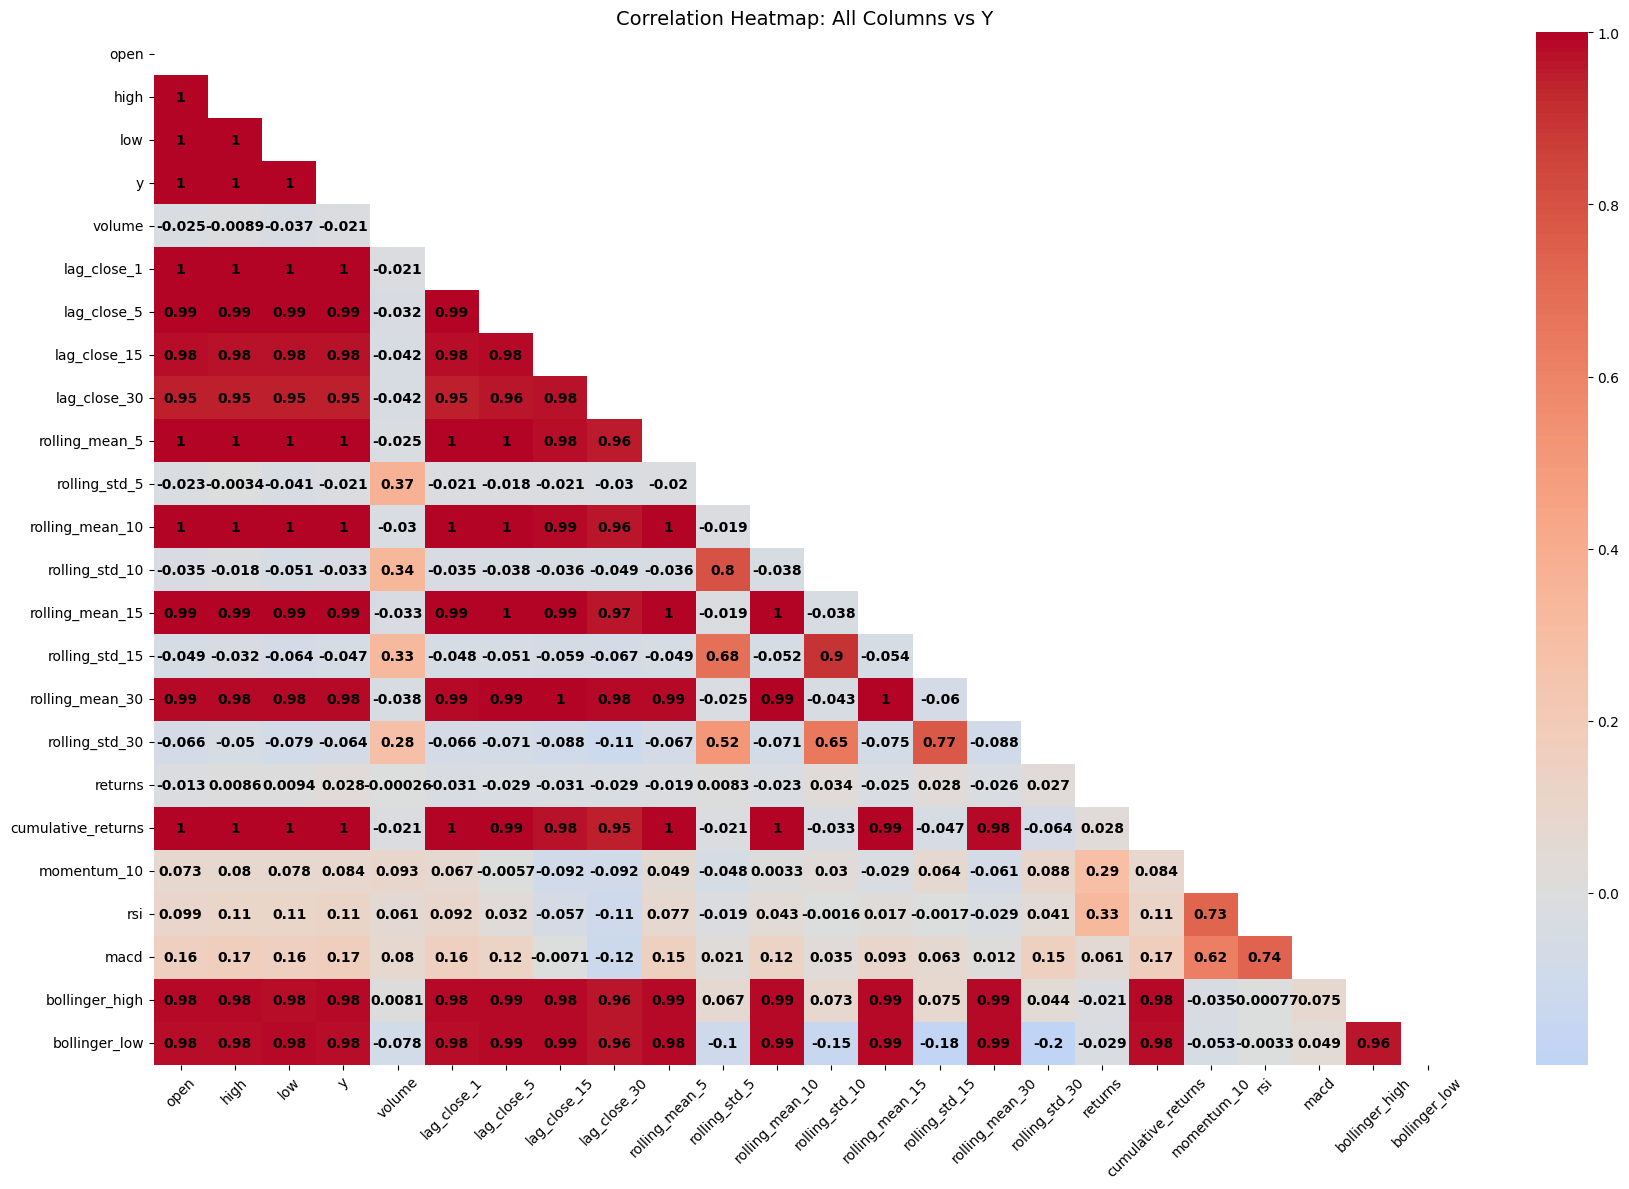

In [22]:
#Plotting the correlation matrix
columns = stock_data.select_dtypes(include=['float64', "int64"]).columns
corr_matrix= stock_data[columns].corr()

# Masking upper triangle 
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))


plt.figure(figsize=(18, 12))
sns.heatmap(corr_matrix,
            mask=mask, 
            cmap='coolwarm', 
            fmt=".2g", 
            annot=True, 
            annot_kws={"size":10, "weight":"bold", "color" :"black"},
            center=0)

plt.title("Correlation Heatmap: All Columns vs Y", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [23]:
# Add cyclical features
stock_data['hour_sin'] = np.sin((2 * np.pi * stock_data['hour'])/24)
stock_data['hour_cos'] = np.cos((2 * np.pi * stock_data['hour'])/24)

stock_data['min_sin'] = np.sin((2 * np.pi * stock_data['minute'])/60)
stock_data['min_cos'] = np.cos((2 * np.pi * stock_data['minute'])/60)

stock_data['day_sin'] = np.sin((2 * np.pi * stock_data['day_of_week'])/5)
stock_data['day_cos'] = np.cos((2 * np.pi * stock_data['day_of_week'])/5)

# Storing copy of stock dataset for future work (if any)
copied_dataset = stock_data.copy()

stock_data = stock_data.drop(columns=["hour", "minute", "day_of_week"], axis =1)

In [24]:
# 1️⃣ Create shifted target (next minute close)
stock_data['y_target'] =stock_data['y'].shift(-1)

# Drop last row as it has no target
stock_data = stock_data[:-1]
stock_data.tail(2)

,ds,open,high,low,y,volume,lag_close_1,lag_close_5,lag_close_15,lag_close_30,...,macd,bollinger_high,bollinger_low,hour_sin,hour_cos,min_sin,min_cos,day_sin,day_cos,y_target
3497,2025-09-05 15:57:00,1242.84998,1243.75,1242.65002,1243.75000,32626,1243.09497,1243.32996,1245.01001,1245.11011,...,-0.375774,1245.475370,1242.204892,-0.707107,-0.707107,-0.309017,0.951057,-0.951057,0.309017,1243.23999
3498,2025-09-05 15:58:00,1243.37000,1243.63,1242.92249,1243.23999,26312,1243.75000,1242.96997,1245.15991,1245.56006,...,-0.366123,1245.409671,1242.149595,-0.707107,-0.707107,-0.207912,0.978148,-0.951057,0.309017,1244.17004


In [25]:
# Rearrange the stock  data columns
stock_data = stock_data[['ds', 'open', 'high', 'low', 'y', 'volume', 'lag_close_1',
       'lag_close_5', 'lag_close_15', 'lag_close_30', 'rolling_mean_5',
       'rolling_std_5', 'rolling_mean_10', 'rolling_std_10', 'rolling_mean_15',
       'rolling_std_15', 'rolling_mean_30', 'rolling_std_30', 'returns',
       'cumulative_returns', 'momentum_10', 'rsi', 'macd', 'bollinger_high',
       'bollinger_low', 'hour_sin', 'hour_cos', 'min_sin',
       'min_cos', 'day_sin', 'day_cos', 'y_target']]

In [26]:
# Dropping irrelevant column
stock_data = stock_data.drop(columns="ds", axis=1)

In [27]:
# Handling nan values 
stock_data = stock_data.ffill()
stock_data = stock_data.bfill()

In [28]:
# Scaling 
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

In [29]:
# Separate cyclic (sin/cos) columns
cyclic_cols = ['hour_sin', 'hour_cos', 'min_sin', 'min_cos', 'day_sin', 'day_cos']

# Features and target
X = stock_data.drop(columns=['y_target'])
y = stock_data[['y_target']]

# Split train-test
forecast_horizon = SETTINGS["preprocessing"]['test_size']   # e.g., 350
X_train, X_test = X[:-forecast_horizon], X[-forecast_horizon:]
y_train, y_test = y[:-forecast_horizon], y[-forecast_horizon:]

# Separate cyclic and non-cyclic features
X_train_cyclic = X_train[cyclic_cols].reset_index(drop=True)
X_test_cyclic = X_test[cyclic_cols].reset_index(drop=True)

X_train_noncyc = X_train.drop(columns=cyclic_cols)
X_test_noncyc = X_test.drop(columns=cyclic_cols)

# Scale only non-cyclic features
X_train_noncyc_scaled = pd.DataFrame(
    x_scaler.fit_transform(X_train_noncyc),
    columns=X_train_noncyc.columns,
    index=X_train_noncyc.index
)

X_test_noncyc_scaled = pd.DataFrame(
    x_scaler.transform(X_test_noncyc),
    columns=X_test_noncyc.columns,
    index=X_test_noncyc.index
)

# Scale target
y_train_scaled = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

# Final X (scaled + cyclic untouched)
X_train_scaled = pd.concat([X_train_noncyc_scaled, X_train_cyclic], axis=1)
X_test_scaled = pd.concat([X_test_noncyc_scaled, X_test_cyclic], axis=1)



In [34]:
X_train_scaled.shape

(3149, 30)

In [35]:
# Saving the loaded data to local 
import glob

pd.DataFrame(X_train_scaled).to_csv(os.path.join(PROCESSED_DATA_STOCK_DIR, f"{datetime.now().strftime('%Y-%m-%d')}_X_train.csv"), mode='w', index=False)
pd.DataFrame(X_test_scaled).to_csv(os.path.join(PROCESSED_DATA_STOCK_DIR, f"{datetime.now().strftime('%Y-%m-%d')}_X_test.csv"), mode='w', index=False)
pd.DataFrame(y_train_scaled).to_csv(os.path.join(PROCESSED_DATA_STOCK_DIR, f"{datetime.now().strftime('%Y-%m-%d')}_y_train.csv"), mode='w', index=False)
pd.DataFrame(y_test_scaled).to_csv(os.path.join(PROCESSED_DATA_STOCK_DIR, f"{datetime.now().strftime('%Y-%m-%d')}_y_test.csv"), mode='w', index=False)


keep_file = SETTINGS['data']['keep_days']
for file in glob.glob(os.path.join(PROCESSED_DATA_STOCK_DIR,  "*.csv")):
    file_time= datetime.fromtimestamp(os.path.getmtime(file))
    if (datetime.now() - file_time).days >keep_file:
        os.remove(file)
        print(f"Deleted old file: {file}")